In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
dfcar = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/bmw.csv")

Mounted at /content/drive/


# Информация о датасете

Датасет состоит из 10781 строк и 9 столбцов

Название столбцов следующие:

1) model - модель BMW

2) year - год выпуска данной модели

3) price - цена за модель

4) transmission - коротка передач

5) mileage - пробег

6) fuelType - тип топлива

7) tax - налог

8) mpg - миль на галлон (1 галлон - 3,79 до 4,55 литра)

9) engineSize - размер двигателя

# Предобработка данных

In [3]:
# Просмотр первых 5 сток
dfcar.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
# Вывод основных статистических показателей
dfcar.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
# Просмотр пустых значений
dfcar.info()

# Как видно пустых значений нет в датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


# Замена категориальных значений на численные

In [40]:
def Categorical_Integer(arr):
  for i in range(len(arr)):
    if arr[i]:
      arr[i] = i
  return arr

def Dictionary(keys, values):
  result_dict = dict(zip(keys[:len(values)], values))
  return result_dict


#dfcar['model'].unique()
key1_1 = [' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3']

key1_2 = [' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3']
values1 = Categorical_Integer(key1_2)



#dfcar['year'].unique()
key2_1 = [2014, 2018, 2016, 2017, 2015, 2019, 2013, 2020, 2002, 2004, 2007,
       2008, 2011, 2012, 2009, 2006, 2010, 2003, 2001, 2005, 2000, 1999,
       1996, 1997, 1998]

key2_2 = [2014, 2018, 2016, 2017, 2015, 2019, 2013, 2020, 2002, 2004, 2007,
       2008, 2011, 2012, 2009, 2006, 2010, 2003, 2001, 2005, 2000, 1999,
       1996, 1997, 1998]
values2 = Categorical_Integer(key2_2)



#dfcar['transmission'].unique()
key3_1 = ['Automatic', 'Manual', 'Semi-Auto']
key3_2 = ['Automatic', 'Manual', 'Semi-Auto']
values3 = Categorical_Integer(key3_2)


#dfcar['fuelType'].unique()
key4_1 = ['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric']
key4_2 = ['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric']
values4 = Categorical_Integer(key4_2)

key = [key1_1, key2_1, key3_1, key4_1]
value = [key1_2, key2_2, key3_2, key4_2]
Dict = []

for i in range(0, 4):
  Dict.append(Dictionary(key[i], value[i]))

names = ['model', 'year', 'transmission', 'fuelType']
for i in range(len(names)):
  dfcar[names[i]] = dfcar[names[i]].replace(Dict[i])

#dfcar

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.000000,0.000000,0.081796,0.0,0.313399,0.00,0.215517,0.111971,0.303030
1,0.043478,0.041667,0.211033,0.0,0.069281,0.25,0.250000,0.080163,0.303030
2,0.000000,0.083333,0.121057,0.0,0.293427,0.00,0.275862,0.098646,0.454545
3,0.086957,0.125000,0.094474,0.0,0.124650,0.00,0.250000,0.143778,0.227273
4,0.130435,0.000000,0.108788,0.0,0.184828,0.00,0.275862,0.096497,0.454545
...,...,...,...,...,...,...,...,...,...
10776,0.260870,0.083333,0.145596,0.0,0.190735,0.00,0.258621,0.104879,0.303030
10777,0.000000,0.083333,0.109606,0.0,0.200683,0.00,0.215517,0.117344,0.303030
10778,0.304348,0.125000,0.097337,0.5,0.119005,0.25,0.344828,0.080163,0.303030
10779,0.086957,0.000000,0.071408,0.0,0.210277,0.00,0.051724,0.126155,0.303030


# Метрики

In [60]:
# Подклучаем необходимые библиотеки
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

# Функция, вычисляющая все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE



In [61]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной. Целевая перменная - price

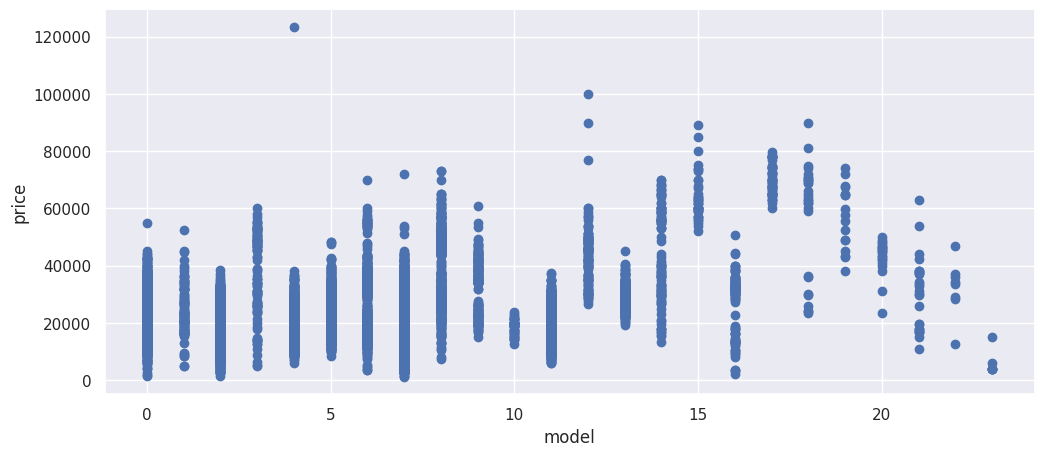

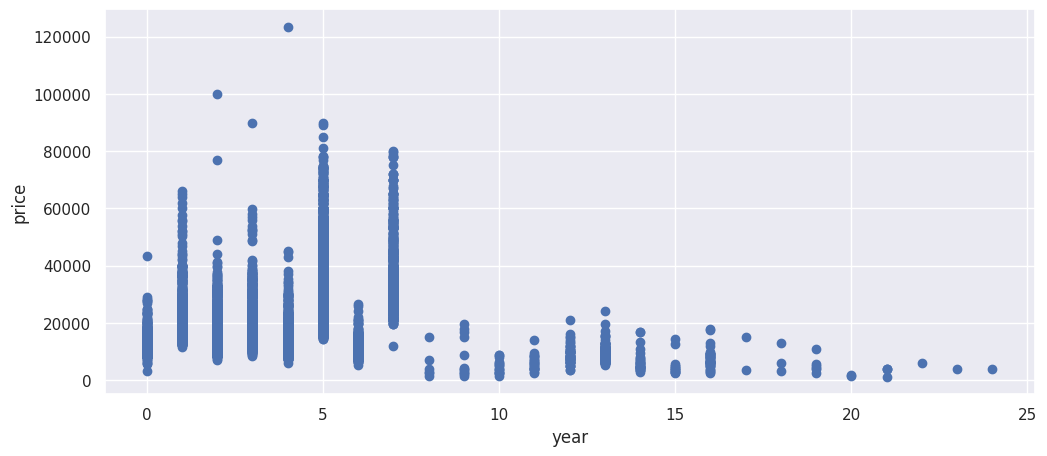

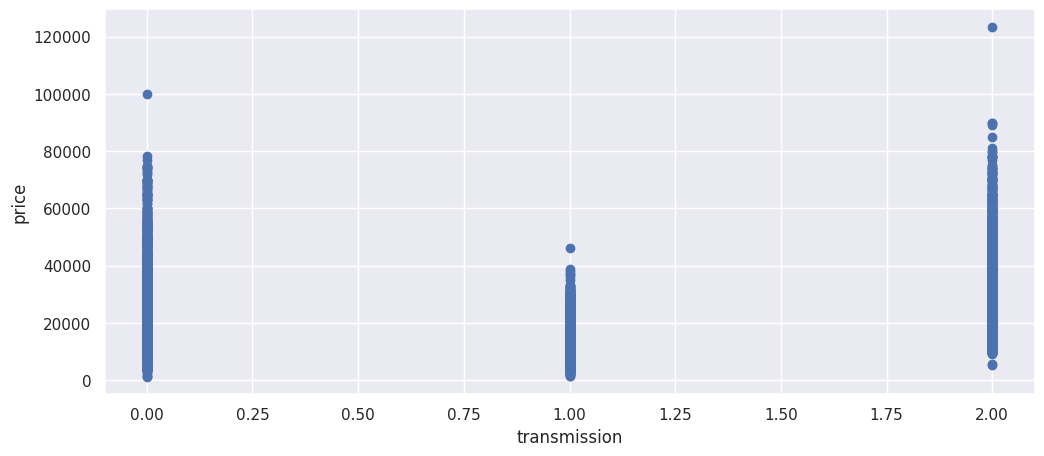

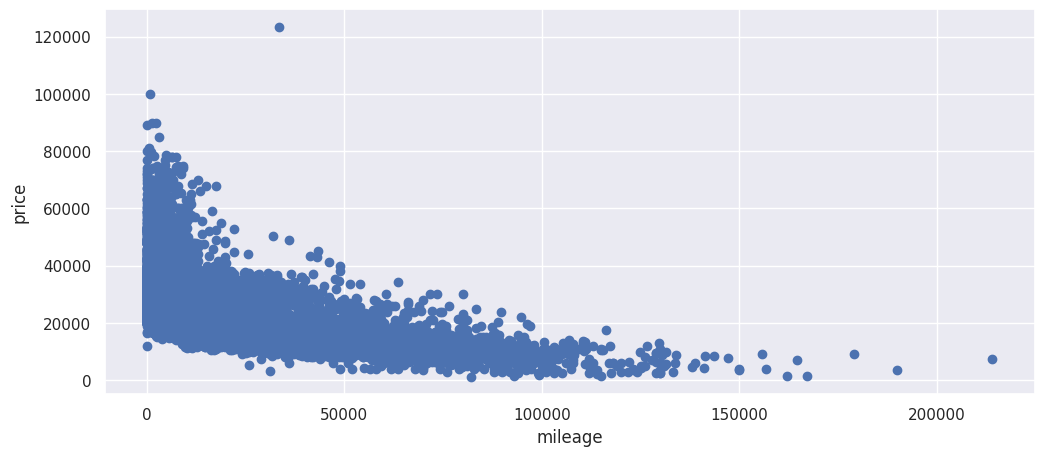

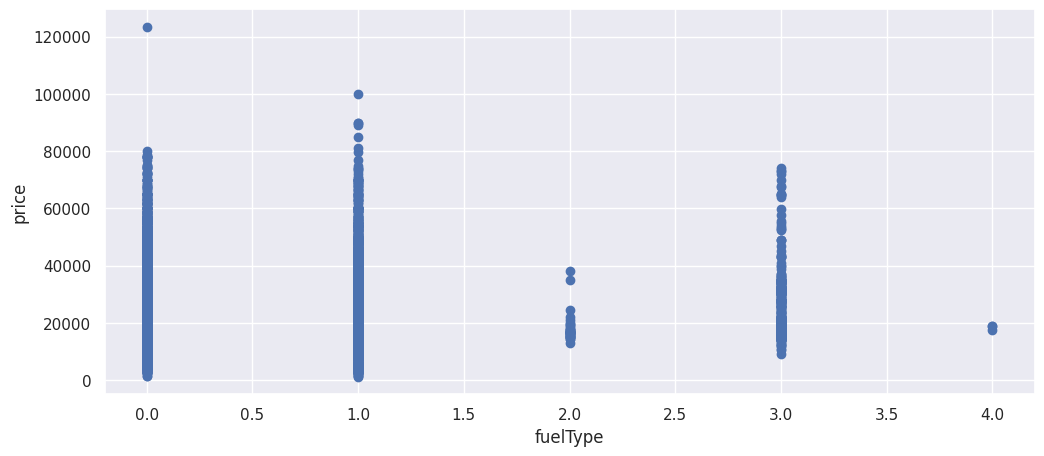

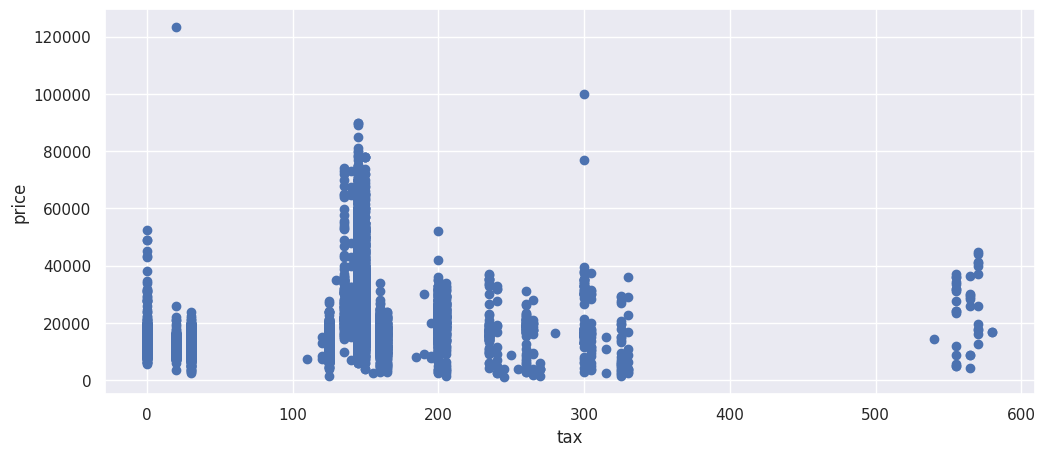

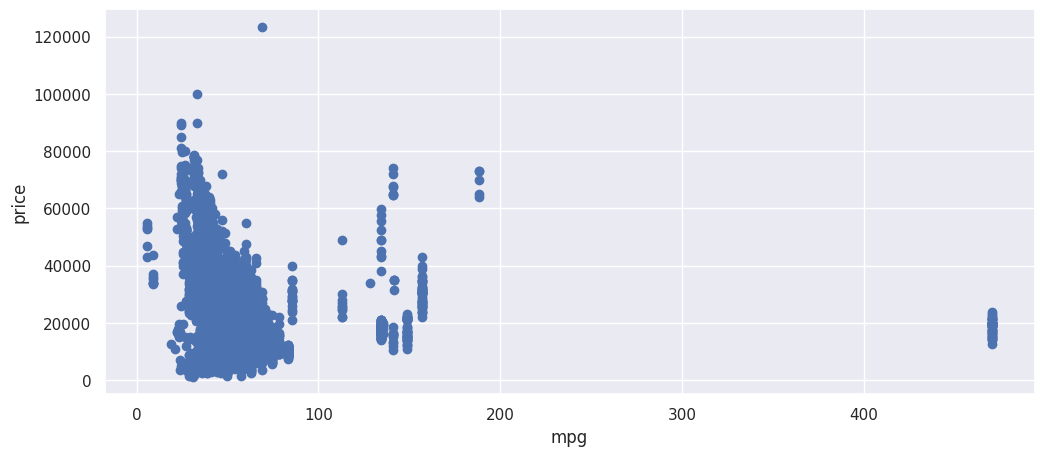

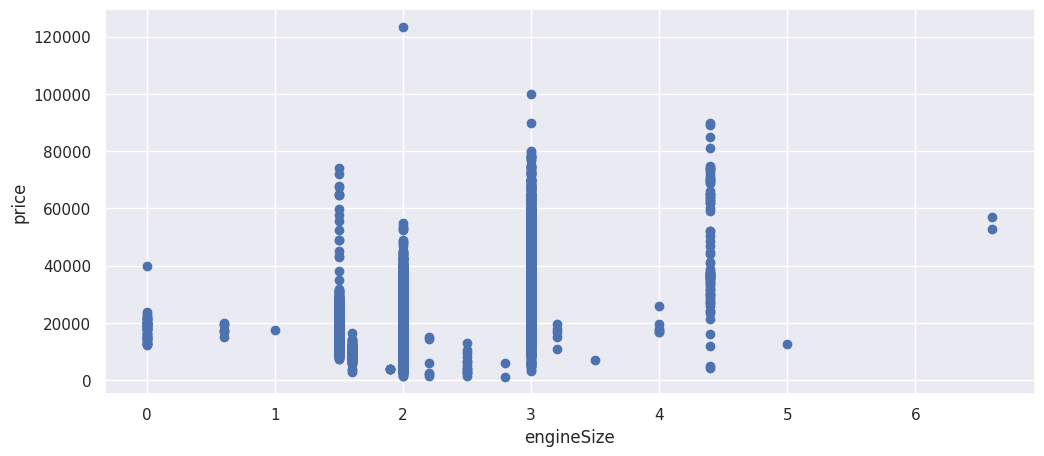

In [76]:
signs = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной
for feature_name in signs:
    plt.figure(figsize=(12, 5))
    plt.scatter(dfcar[feature_name], dfcar['price'])
    plt.ylabel('price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

# Регрессии

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_dfcar = scaler.fit_transform(dfcar)
dfcar = pd.DataFrame(normalized_dfcar, columns=dfcar.columns)

In [108]:
# Подготовливаем датасет к обучению
from sklearn.model_selection import train_test_split

X = dfcar.drop('price', axis = 1)
y = dfcar['price']
print(f'X shape: {X.shape} | y shape: {y.shape}')

X shape: (10781, 8) | y shape: (10781,)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15)

In [110]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression() # создание модели
modelLR.fit(X_train, y_train) # обучении модели
y_pr_LR = modelLR.predict(X_test) # предсказ новых значений
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR) #  вычисляем метрики


RMSE:  0.0585
  R2: 0.6203
 Adjusted R2: 0.6189
 Cross Validated R2: 0.656


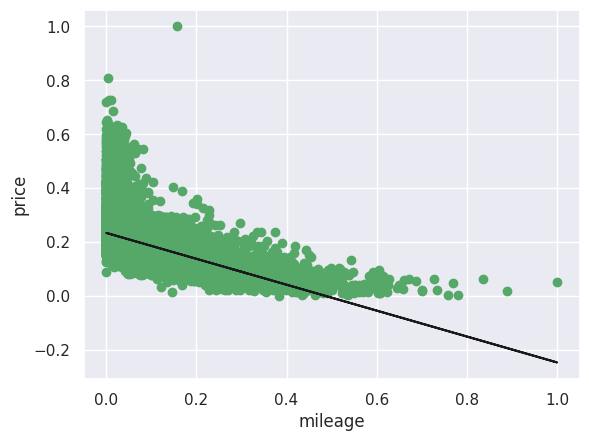

In [111]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dfcar['mileage'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dfcar['price'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('price', size=12)
plt.xlabel('mileage', size=12)
plt.show()

In [122]:
# Полиноминалиноя регрессия
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 15)


In [123]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.0431
  R2: 0.7936
 Adjusted R2: 0.7893
 Cross Validated R2: 0.8097


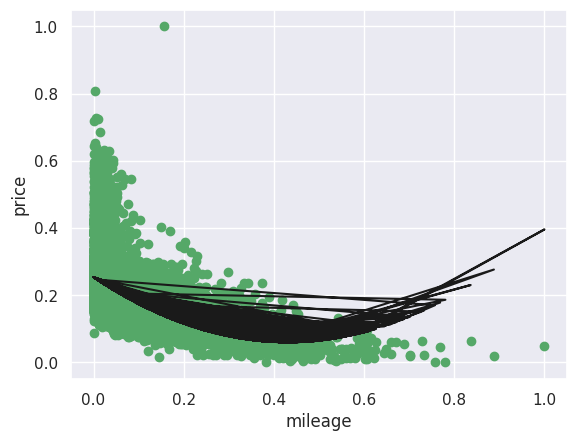

In [125]:
# Отобразим как выглядит полиноминальная регрессия
X2 = dfcar['mileage'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dfcar['price'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('price', size=12)
plt.xlabel('mileage', size=12)
plt.show()



In [126]:
# Регрессия принятия решений
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0335
  R2: 0.8755
 Adjusted R2: 0.875
 Cross Validated R2: 0.9084


In [127]:
# Регрессия случайного леса
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)


RMSE:  0.0281
  R2: 0.912
 Adjusted R2: 0.9117
 Cross Validated R2: 0.9446


In [131]:
# Регрессия опорных векторов

from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)


RMSE:  0.0615
  R2: 0.5793
 Adjusted R2: 0.5778
 Cross Validated R2: 0.6152


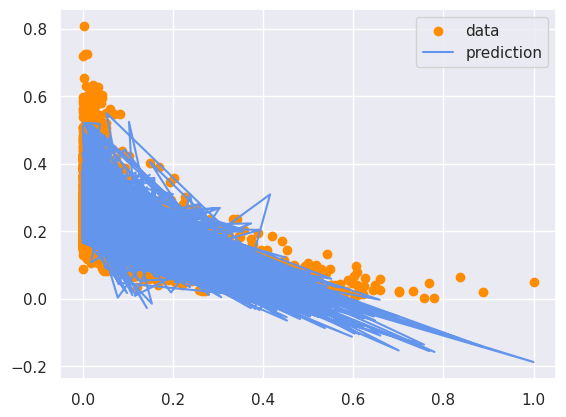

In [132]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [133]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.052
  R2: 0.6991
 Adjusted R2: 0.6979
 Cross Validated R2: 0.7226


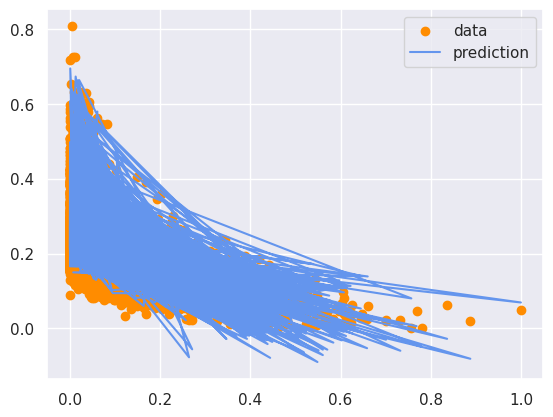

In [134]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [135]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0458
  R2: 0.7665
 Adjusted R2: 0.7656
 Cross Validated R2: 0.7814


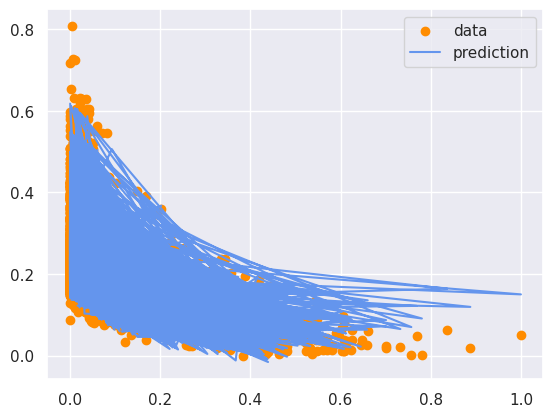

In [142]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [145]:
# Регрессия ElasticNet
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.0949
  R2: -0.0
 Adjusted R2: -0.0037
 Cross Validated R2: -0.0009


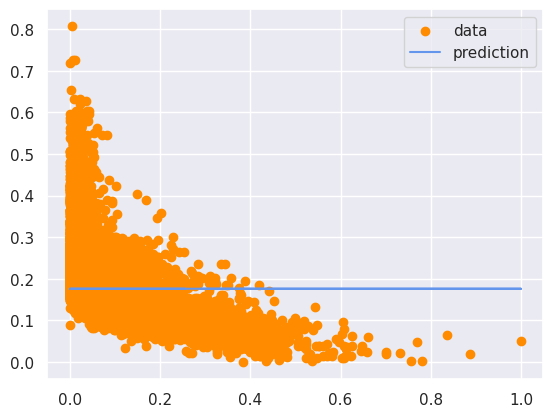

In [146]:
plt.scatter(X_train["mileage"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["mileage"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()